본 강좌에서는 이진분류(binary classification)을 다층 퍼셉트론으로 해보겠습니다. 다음과 같은 순서로 진행하겠습니다.

1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

---

### 데이터셋 준비하기

The dataset we will use in this tutorial is the Sonar dataset. This is a dataset that describes sonar chirp returns bouncing o↵ di↵erent surfaces. The 60 input variables are the strength of the returns at di↵erent angles. It is a binary classification problem that requires a model to di↵erentiate rocks from metal cylinders.
It is a well understood dataset. All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string M for mine and R for rock, which will need to be converted to integers 1 and 0. The dataset contains 208 observations. The dataset is in the bundle of source code provided with this book. Alternatively, you can download the dataset and place it in your working directory with the filename sonar.csv1.

[다운](https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data)


In [5]:
# Binary Classification with Sonar Dataset: Standardized
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [6]:
# load dataset
dataframe = pandas.read_csv("warehouse/sonar.all-data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

---

### 모델 구성하기

Dense 클래스를 사용하여 완전 연결 레이어(Fully Connected Layer)를 정의할 수 있다.

- 첫번째 인자 : 뉴런의 수
- 두번째 인자 : 네트워크 가중치(network weight) 초기화 방법
 - uniform : 균등분포 (uniform distribution)의 작은 난수들로 초기화 (0~0.05 사이)
 - normal : 가우시안 분포 (Gaussian distribution)로 생성된 작은 난수들로 초기화 
- 세번째 인자 : 활성화 함수(activation function) 지정
 - relu : rectifier 활성화 함수
 - sigmoid : sigmoid 활성화 함수
 - tanh : tanh 활성화 함수
 
마지막 레이어는 sigmoid 할성화 함수를 사용하는데, 이유는 결과가 0과 1사이로 나오는 것을 보장하며, 양성 클래스의 확률로 쉽게 매핑할 수 있기 때문이다. 또한 0.5 임계치(threshold)을 같은 클래스의 범주형 분류(hard classification)를 할 수 있다.

- 첫번째 은닉층(hidden layer)는 12개 뉴런을 가지고, 8개 입력을 받아들인다.
- 두번째 은닉층은 8개 뉴런을 가진다.
- 마지막 레이어는 클래스를 예측하는 1개의 뉴런을 가진다.

In [7]:
# create model
model = Sequential()
model.add(Dense(60, input_dim=60, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))

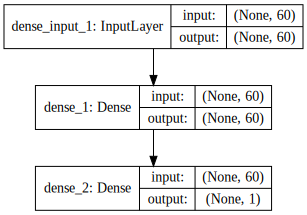

In [8]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![svg]({{ site.baseurl }}/posts_warehouse/2017-2-4-1.svg)

---

### 모델 엮기

컴파일 시에 정의해야하는 것들
- 가중치 세트를 평가하는 데 사용할 손실함수(loss function)
 - binary_crossentropy : 이진 분류를 위한 logarithmic loss
- 네트워크의 다른 가중치를 검객하는 데 사용되는 최적화 알고리즘
 - adam : 효율적인 경사 하강법(gradient descent) 알고리즘
- 학습과정에서 수집하기 싶은 측정 기준

In [9]:
# Compile model
model.compile(loss= 'binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

---

### 모델 학습시키기

- nb_epoch : 데이터셋에 대한 반복 횟수
- batch_size : 네트워크에서 가중치 개갱신 전에 평가되는 인스턴스의 수

In [11]:
# Fit the model
model.fit(X, encoded_Y, nb_epoch=100, batch_size=5) # nb_epoch 150

Epoch 1/100
208/208 [==============================] - 0s - loss: 0.6872 - acc: 0.5337     
Epoch 2/100
208/208 [==============================] - 0s - loss: 0.6729 - acc: 0.5337     
Epoch 3/100
208/208 [==============================] - 0s - loss: 0.6579 - acc: 0.6346     
Epoch 4/100
208/208 [==============================] - 0s - loss: 0.6397 - acc: 0.6779     
Epoch 5/100
208/208 [==============================] - 0s - loss: 0.6145 - acc: 0.7115     
Epoch 6/100
208/208 [==============================] - 0s - loss: 0.5971 - acc: 0.6779     
Epoch 7/100
208/208 [==============================] - 0s - loss: 0.5614 - acc: 0.7548     
Epoch 8/100
208/208 [==============================] - 0s - loss: 0.5394 - acc: 0.7404     
Epoch 9/100
208/208 [==============================] - 0s - loss: 0.5266 - acc: 0.7548     
Epoch 10/100
208/208 [==============================] - 0s - loss: 0.5059 - acc: 0.7692     
Epoch 11/100
208/208 [==============================] - 0s - loss: 0.4863 - acc

---

### 모델 사용하기

In [15]:
# evaliuate
scores = model.evaluate(X, encoded_Y)

print("")
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 32/208 [===>..........................] - ETA: 0s
acc: 94.23%


---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/2017/01/27/Keras_Lecture_Plan/)
* 이전 : [딥러닝 이야기/레이어 이야기](https://tykimos.github.io/2017/01/27/Layer_Talk/)
* 다음 : [딥러닝 기본 실습/컨볼루션 신경망 모델 만들어보기](https://tykimos.github.io/2017/02/04/CNN_Getting_Started/)